In [1]:
# !pip install tensorflow matplotlib
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
import keras

2024-11-06 19:21:48.662391: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 19:21:48.790483: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 19:21:48.983428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730901109.193097   17835 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730901109.252664   17835 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 19:21:49.628595: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
cifar10 = keras.datasets.cifar10 # Importing cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # Splitting it into training and testing data

for i in (x_train, y_train, x_test, y_test):
  print(i.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[6]


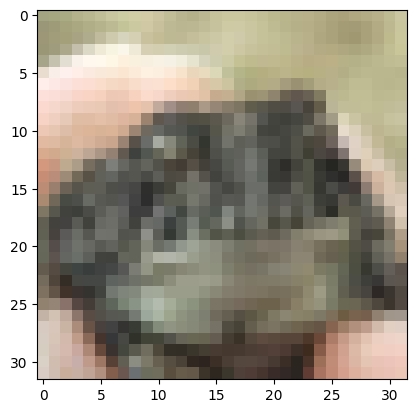

In [3]:
plt.imshow(x_train[25])
print(y_train[25])
plt.show()

In [4]:
#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value

In [5]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [6]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [7]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [8]:
print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [9]:
from tensorflow import keras

# Create a sequential model
model = keras.Sequential()

# Convolutional layers
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  # 10 classes for classification

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()


/home/anish/Desktop/DL/DL-Codes/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-06 19:22:11.792042: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Training the model
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

2024-11-06 19:22:17.402767: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2103 - loss: 2.1426

2024-11-06 19:23:26.358480: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1667/1667 ━━━━━━━━━━━━━━━━━━━━ 72s 42ms/step - accuracy: 0.2103 - loss: 2.1425 - val_accuracy: 0.3344 - val_loss: 1.8468
Epoch 2/5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 68s 41ms/step - accuracy: 0.3891 - loss: 1.6967 - val_accuracy: 0.4535 - val_loss: 1.5028
Epoch 3/5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.4588 - loss: 1.4993 - val_accuracy: 0.5072 - val_loss: 1.3651
Epoch 4/5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.5117 - loss: 1.3615 - val_accuracy: 0.5516 - val_loss: 1.2722
Epoch 5/5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.5453 - loss: 1.2757 - val_accuracy: 0.5090 - val_loss: 1.3959


<Axes: >

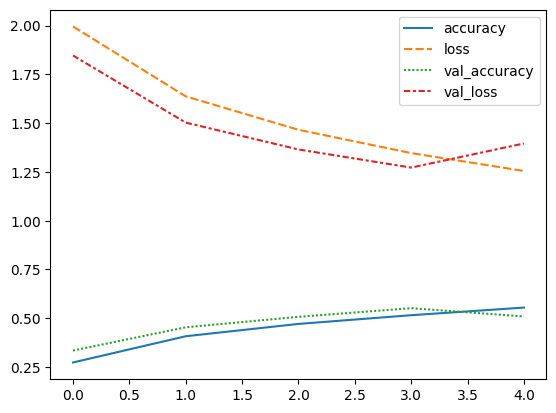

In [11]:
import seaborn as sns
sns.lineplot(model.history.history)

In [12]:
predictions = model.predict(x_test)

2024-11-06 19:28:40.488466: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


In [13]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

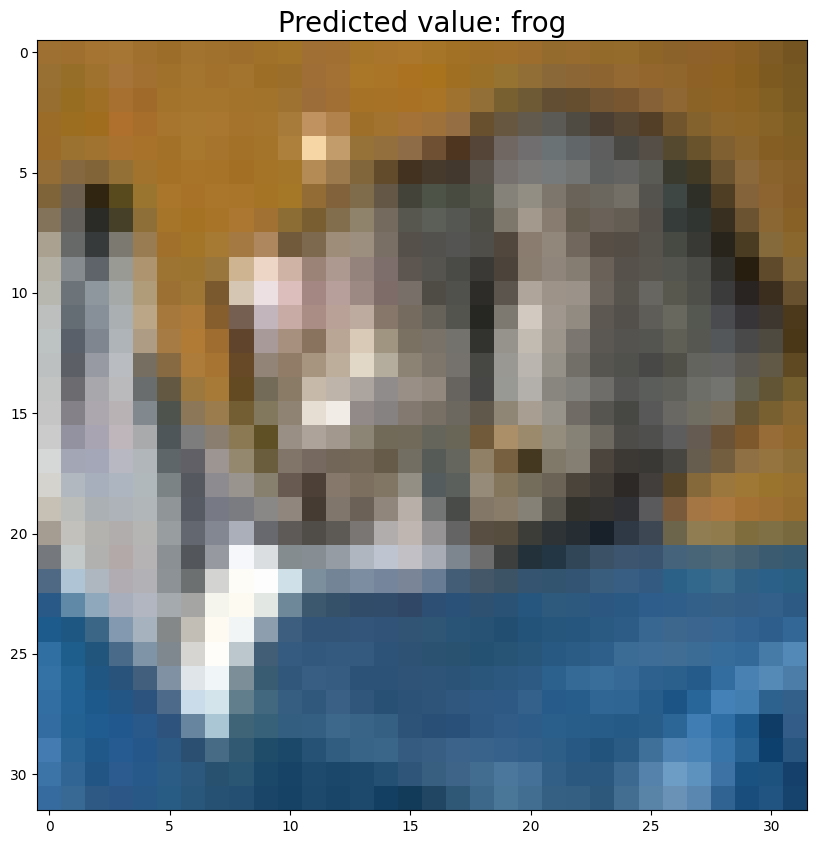

In [16]:
plt.figure(figsize=[10,10])
plt.imshow(x_test[0].reshape(32, 32, -1))
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[0], axis=0)]), size=20)
plt.grid(False)